In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils as ut

In [2]:
df = pd.read_csv('./results/sim/joint_benchmarks.csv', index_col=0)
df = ut.extract_cols(df)
df['id'] = df.apply(lambda x: x['id'].upper(), axis=1)

df['SHD_norm'] = df.groupby(['id', 'graph_p', 'graph_d', 'graph_type', 'data_sem', 'data_n'])['SHD_pattern'].apply(lambda x: (x-x.min())/(x.max()-x.min()))

/home/damian/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (24,26,27,28,29,33,34,39,41,42,43,44,45,47,48,57,58,59,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## All DGPs

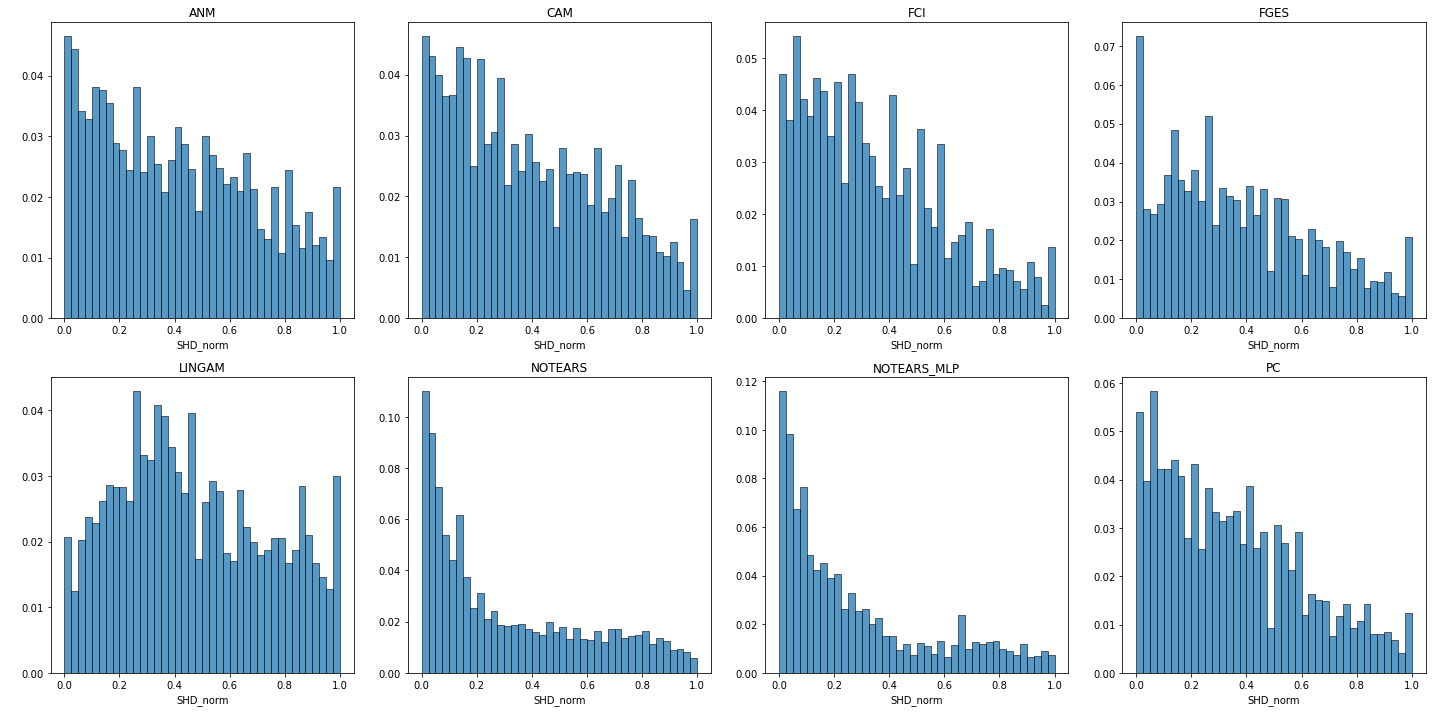

In [3]:
algs = df['id'].unique()
algs.sort()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, alg in zip(axes, algs):
    ax.set_title(alg)
    ax.set_xlabel('SHD_norm')
    ax.set_ylabel(' ')
    sns.histplot(df.loc[df['id'] == alg, 'SHD_norm'], ax=ax, stat='probability', bins=40)

plt.tight_layout()
plt.savefig('./plots/dist/norm/all.pdf', dpi=1000)

[Text(0, 0.5, ' ')]

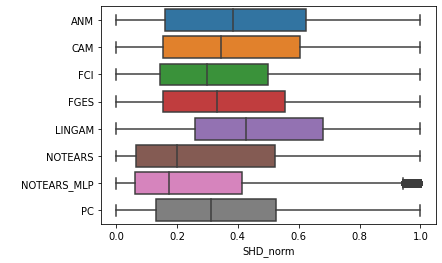

In [16]:
sns.boxplot(data=df, x='SHD_norm', y='id', order=algs).set(ylabel=' ')

## Trends

In [4]:
def plot_dist_delta(df, gr):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    algs = df['id'].unique()
    algs.sort()

    for ax, alg in zip(axes, algs):
        ax.set_title(alg)
        ax.set_xlabel('SHD_norm')
        ax.set_ylabel(' ')
        sns.histplot(df.loc[df['id'] == alg], x='SHD_norm', hue=gr, ax=ax, stat='probability', bins=40, palette='deep')

    plt.tight_layout()
    #plt.show()
    plt.savefig(f'./plots/dist/norm/{gr}.pdf', dpi=1000)

def plot_box_delta(df, gr):
    algs = df['id'].unique()
    algs.sort()
    sns.catplot(data=df, x='SHD_norm', y='id', hue=gr, kind='box', orient='h', order=algs).set(ylabel=' ')
    plt.show()

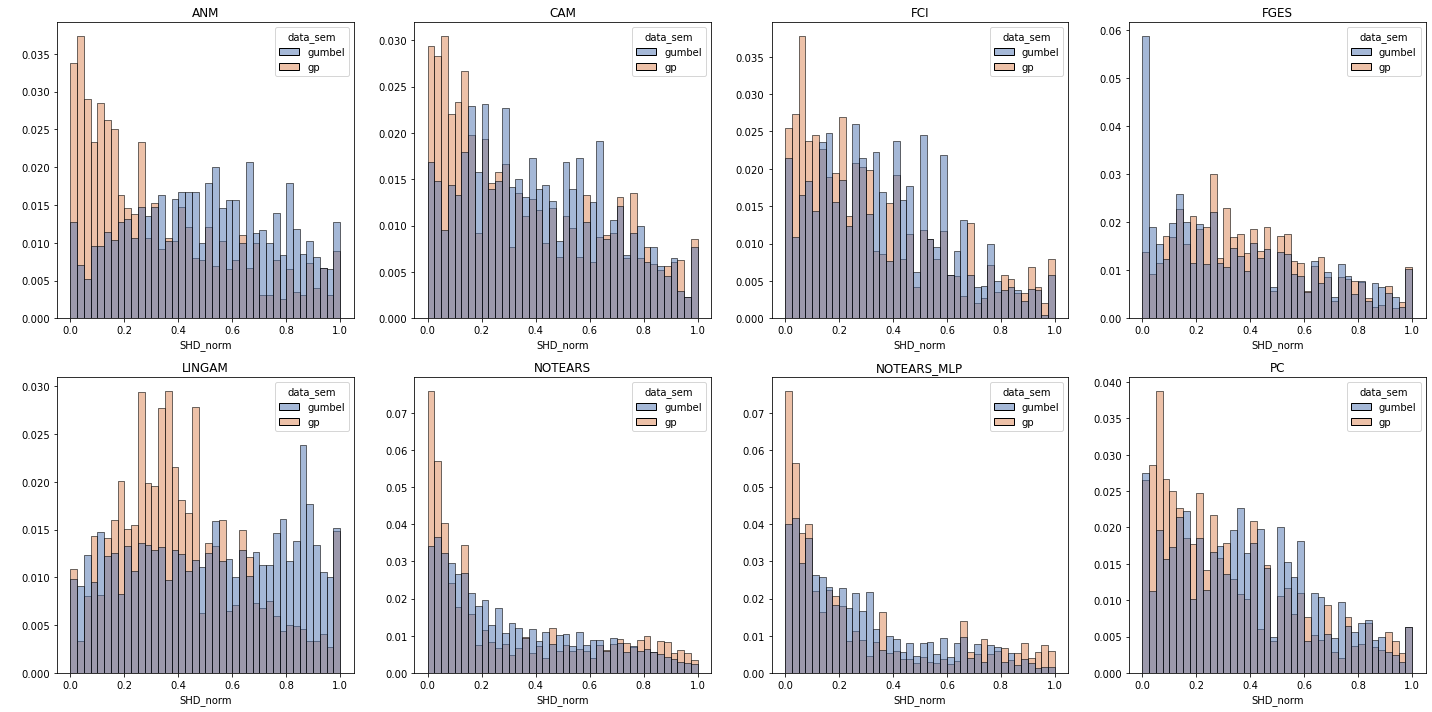

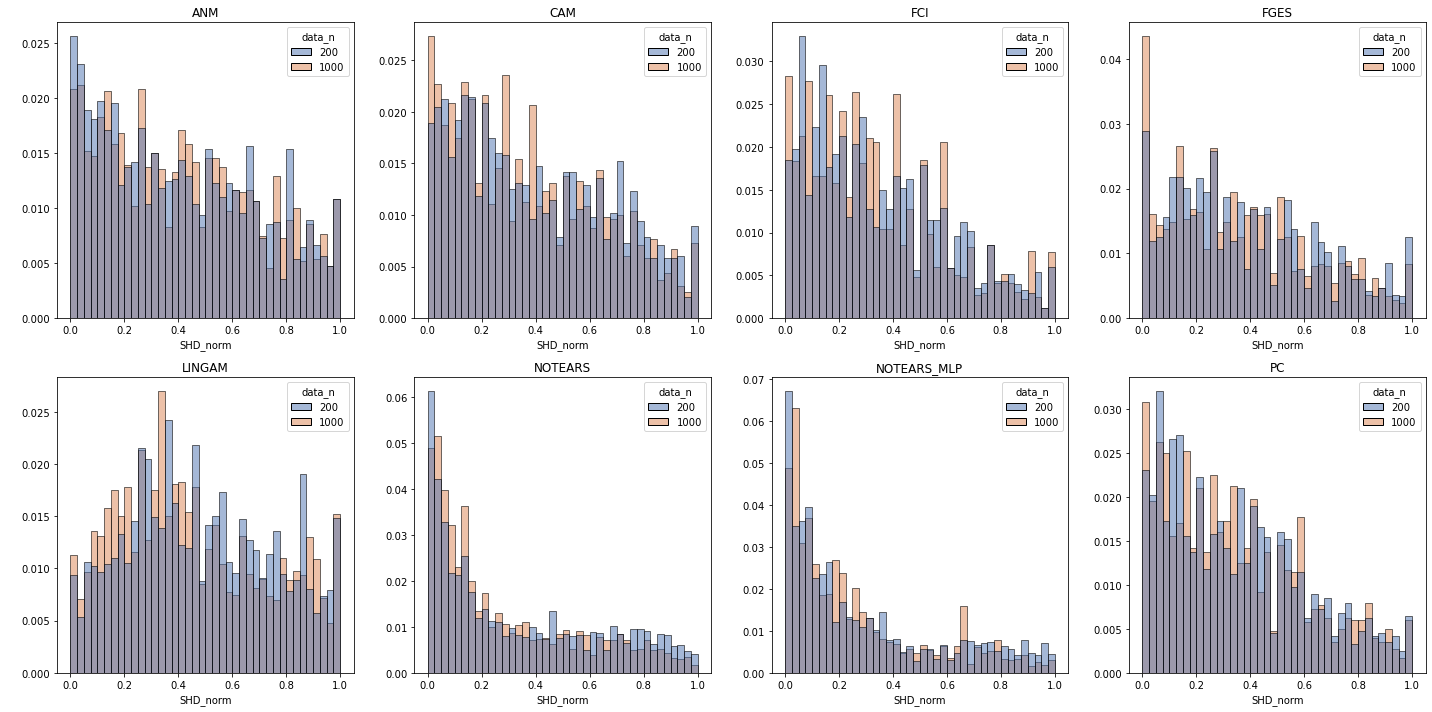

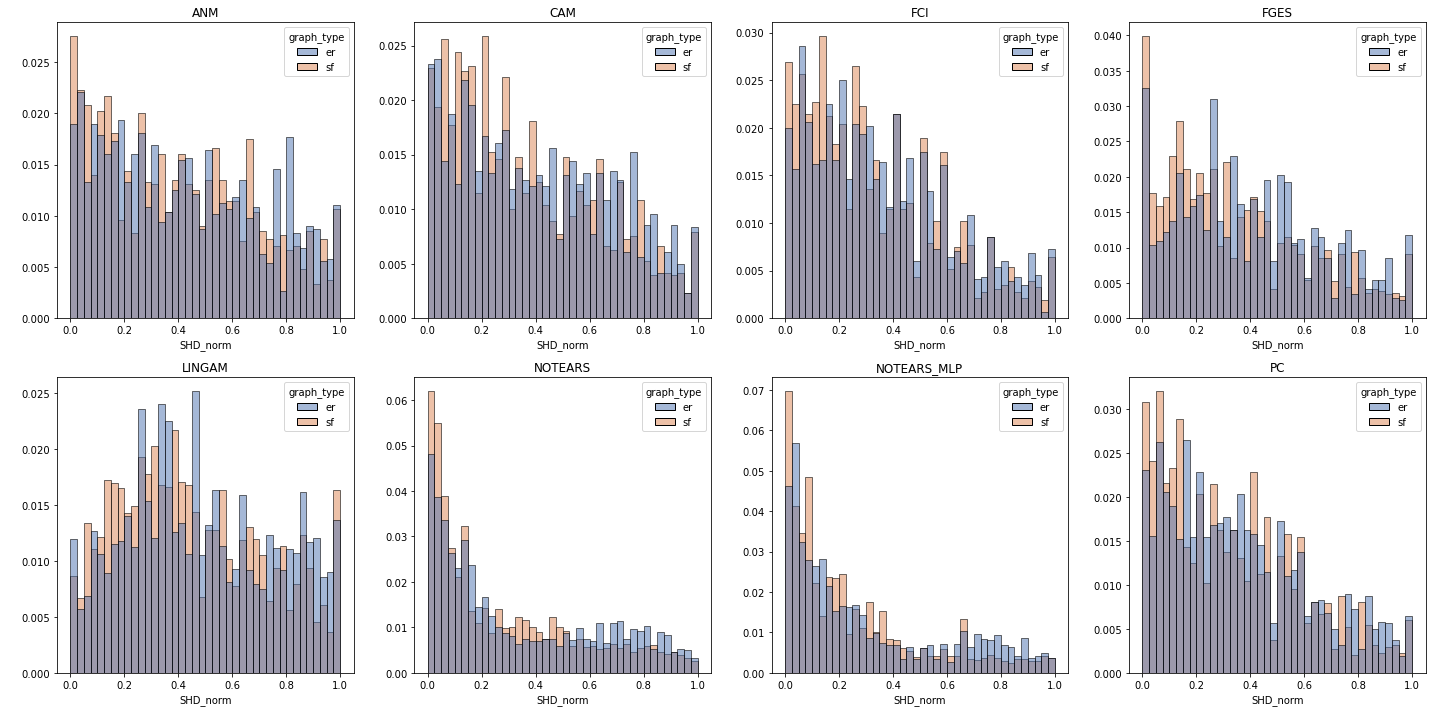

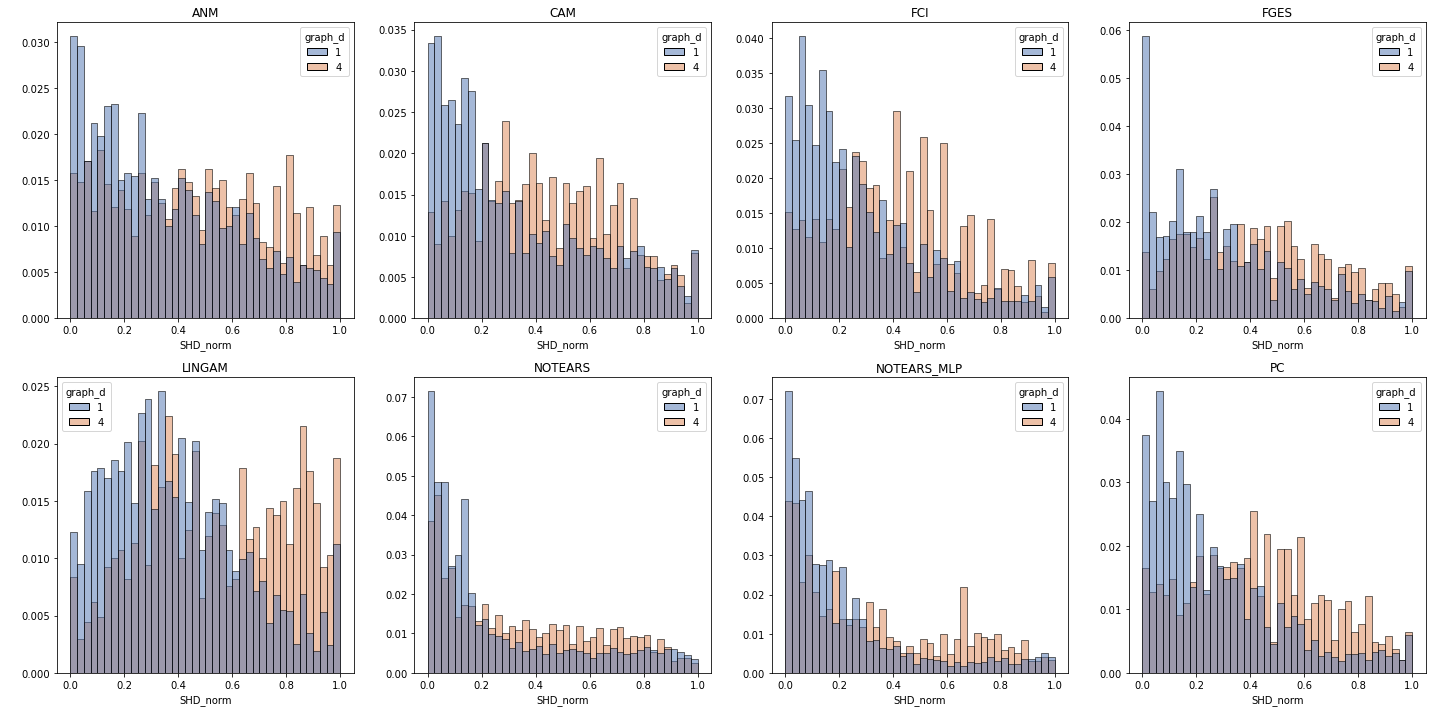

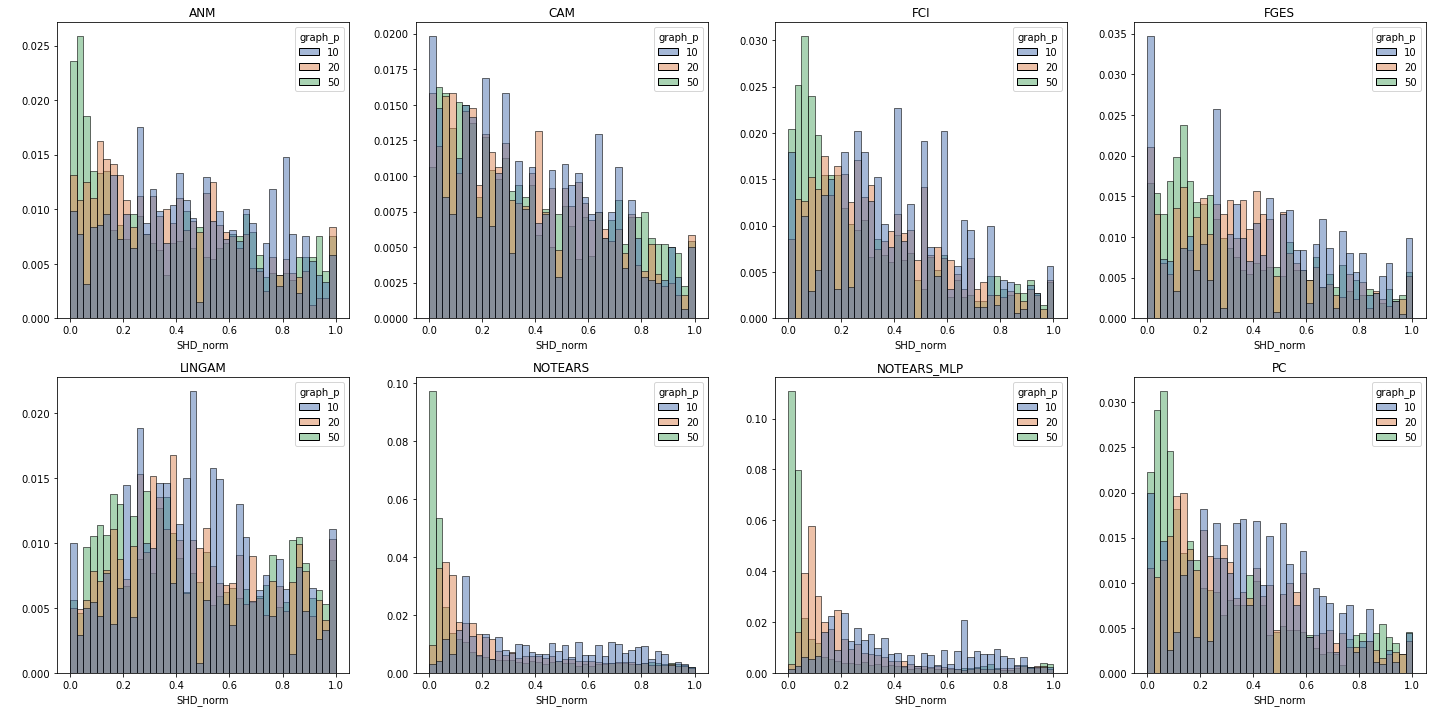

In [5]:
for o in ['data_sem', 'data_n', 'graph_type', 'graph_d', 'graph_p']:
    plot_dist_delta(df, o)

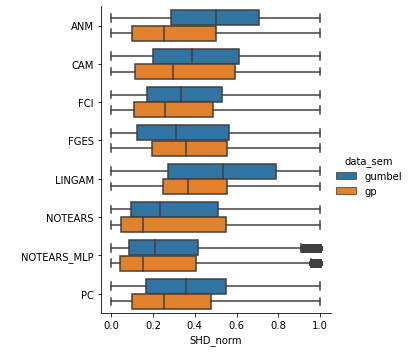

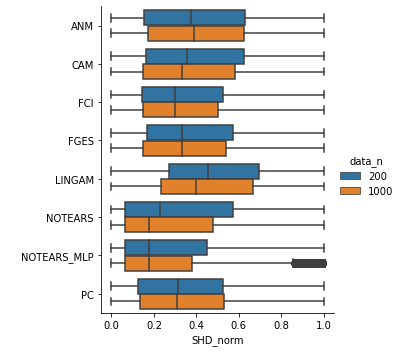

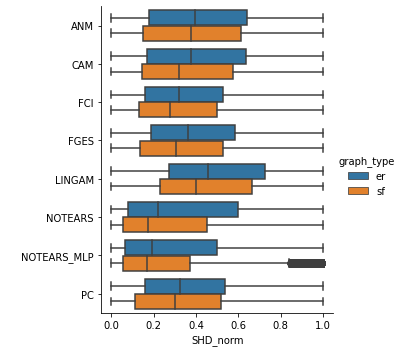

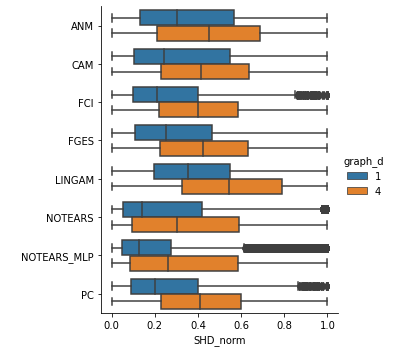

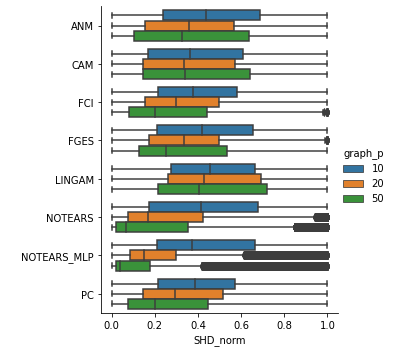

In [21]:
for o in ['data_sem', 'data_n', 'graph_type', 'graph_d', 'graph_p']:
    plot_box_delta(df, o)